## Importing Necessary Libarary and File loading

In [1]:
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load the CSV file with preprocessed content
csv_filename = "preprocessed_content.csv"
data = pd.read_csv(csv_filename)

# Extract the content column
content_column = data['sentences']

# Create an empty directed graph
G = nx.DiGraph()

## Relationship Establishment and Graph 

In [3]:
# Process sentences and add nodes and edges to the graph
for content in content_column:
    doc = nlp(content)
    
    # Extract subjects, objects, and relationships
    subject = None
    obj = None
    relation = None
    
    for token in doc:
        
        if "subj" in token.dep_:
            subject = token.text
            relation = token.head.text  # The root of the dependency tree is the main relation
            
        if "obj" in token.dep_:
            obj = token.text
            relation = token.head.text
    
    # Add nodes for entities
    if subject:
        G.add_node(subject, label=subject, type="entity")
        
    if obj:
        G.add_node(obj, label=obj, type="entity")
        
    # Add edge if subject, object, and relation are not None
    if subject and obj and relation:
        G.add_edge(subject, obj, label=relation, type="relationship")
        
    # Extract named entities
    for ent in doc.ents:
        entity = ent.text
        G.add_node(entity, label=entity, type="entity")


### Testing Function for relationship

In [4]:

def create_relationship_graph(data, graph=None):
    if graph is None:
        graph = nx.DiGraph()

    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process sentences and add nodes and edges to the graph
    for content in data:
        doc = nlp(content)

        # Extract subjects, objects, and relationships
        subject = None
        obj = None
        relation = None

        for token in doc:
            if "subj" in token.dep_:
                subject = token.text
                relation = token.head.text  # The root of the dependency tree is the main relation

            if "obj" in token.dep_:
                obj = token.text
                relation = token.head.text

        # Add nodes for entities
        if subject:
            graph.add_node(subject, label=subject, type="entity")

        if obj:
            graph.add_node(obj, label=obj, type="entity")

        # Add edge if subject, object, and relation are not None
        if subject and obj and relation:
            graph.add_edge(subject, obj, label=relation, type="relationship")

        # Extract named entities
        for ent in doc.ents:
            entity = ent.text
            graph.add_node(entity, label=entity, type="entity")

    return graph


In [5]:

sentences = [
    "The cat chased the mouse.",
    "The dog barked loudly.",
    "The mouse escaped the cat's pursuit."
]

# Create an empty graph
G = nx.DiGraph()

# Call the function to process sentences and add nodes and edges to the graph
G = create_relationship_graph(sentences, G)

# Print nodes and edges in the graph
print("Nodes:", G.nodes())
print("Edges:", G.edges())


Nodes: ['cat', 'mouse', 'dog', 'pursuit']
Edges: [('cat', 'mouse'), ('mouse', 'pursuit')]


In [6]:
# Print the extracted entities
extracted_entities = set()
for node, data in G.nodes(data=True):
    if data['type'] == 'entity':
        extracted_entities.add(data['label'])

print("Extracted Entities:", extracted_entities)

Extracted Entities: {'dog', 'pursuit', 'cat', 'mouse'}


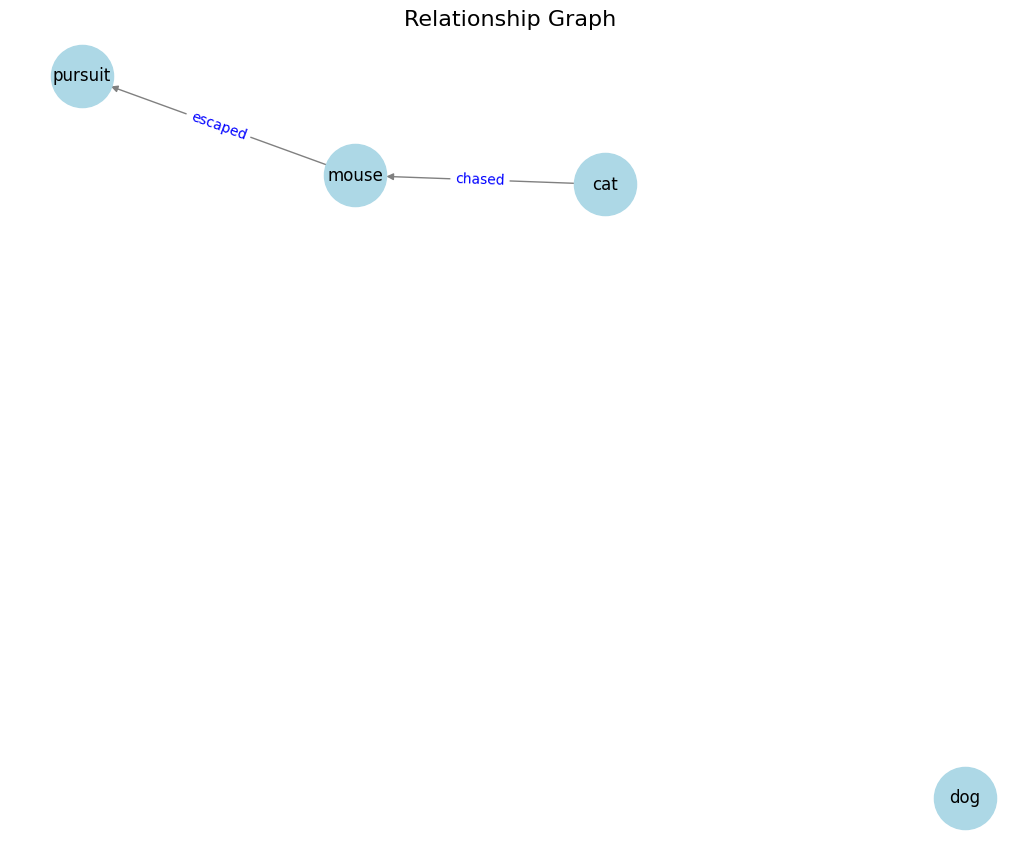

In [7]:
# Draw and visualize the graph
pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)  # Adjust layout settings
labels = nx.get_node_attributes(G, 'label')  # Get node labels

plt.figure(figsize=(10, 8))  # Set figure size
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, font_size=12, font_color='black', node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'label')  # Get edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

plt.title("Relationship Graph", fontsize=16)
plt.show()

### class approach for relationship(OOPS)

In [8]:
import networkx as nx
import spacy

class RelationshipGraphCreator:
    def __init__(self):
        self.graph = nx.DiGraph()
        self.nlp = spacy.load("en_core_web_sm")

    def create_relationship_graph(self, data):
        extracted_data = []
        
        for content in data:
            doc = self.nlp(content)

            subject = None
            obj = None
            relation = None
            entity = None

            for token in doc:
                if "subj" in token.dep_:
                    subject = token.text
                    relation = token.head.text

                if "obj" in token.dep_:
                    obj = token.text
                    relation = token.head.text

            if subject:
                self.graph.add_node(subject, label=subject, type="entity")

            if obj:
                self.graph.add_node(obj, label=obj, type="entity")

            if subject and obj and relation:
                self.graph.add_edge(subject, obj, label=relation, type="relationship")

            for ent in doc.ents:
                entity = ent.text
                self.graph.add_node(entity, label=entity, type="entity")
                
            extracted_data.append({
                "content": content,
                "subject": subject,
                "object": obj,
                "entity": entity
            })

        return self.graph, extracted_data



In [9]:
# Create an instance of the class
graph_creator = RelationshipGraphCreator()

# Example data
data = ["The cat chased the mouse.", "Apple is a technology company.", "Mount Everest is the highest peak."]

# Create the relationship graph
graph, extracted_data = graph_creator.create_relationship_graph(data)

# You can now work with the 'graph' object
print("Nodes:", graph.nodes)
print("Edges:", graph.edges)


Nodes: ['cat', 'mouse', 'Apple', 'Everest', 'Mount Everest']
Edges: [('cat', 'mouse')]


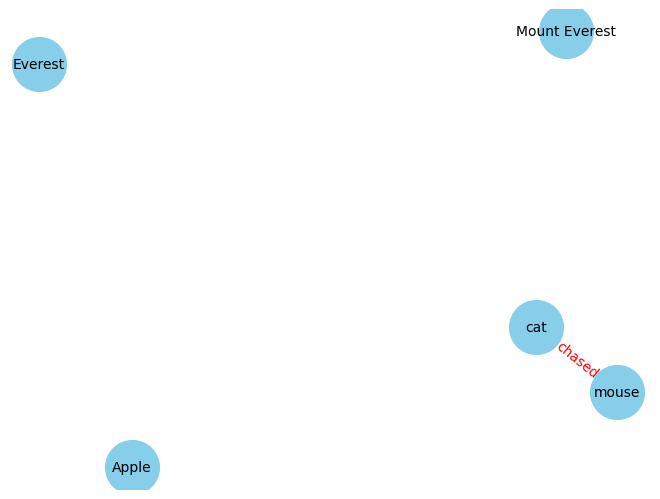

In [10]:

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, font_size=10, font_color="black", node_color="skyblue", edge_color="gray")
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="red")

plt.show()

### Running all the preprocessed data through the class

In [11]:
# Create an instance of the class
graph_creator = RelationshipGraphCreator()

# Read data from CSV
data_df = pd.read_csv("./preprocessed_content.csv")
data = data_df["sentences"].tolist()



C:\Users\Nandan\AppData\Local\Temp\ipykernel_23368\3765523368.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Prevent node labels from overlapping


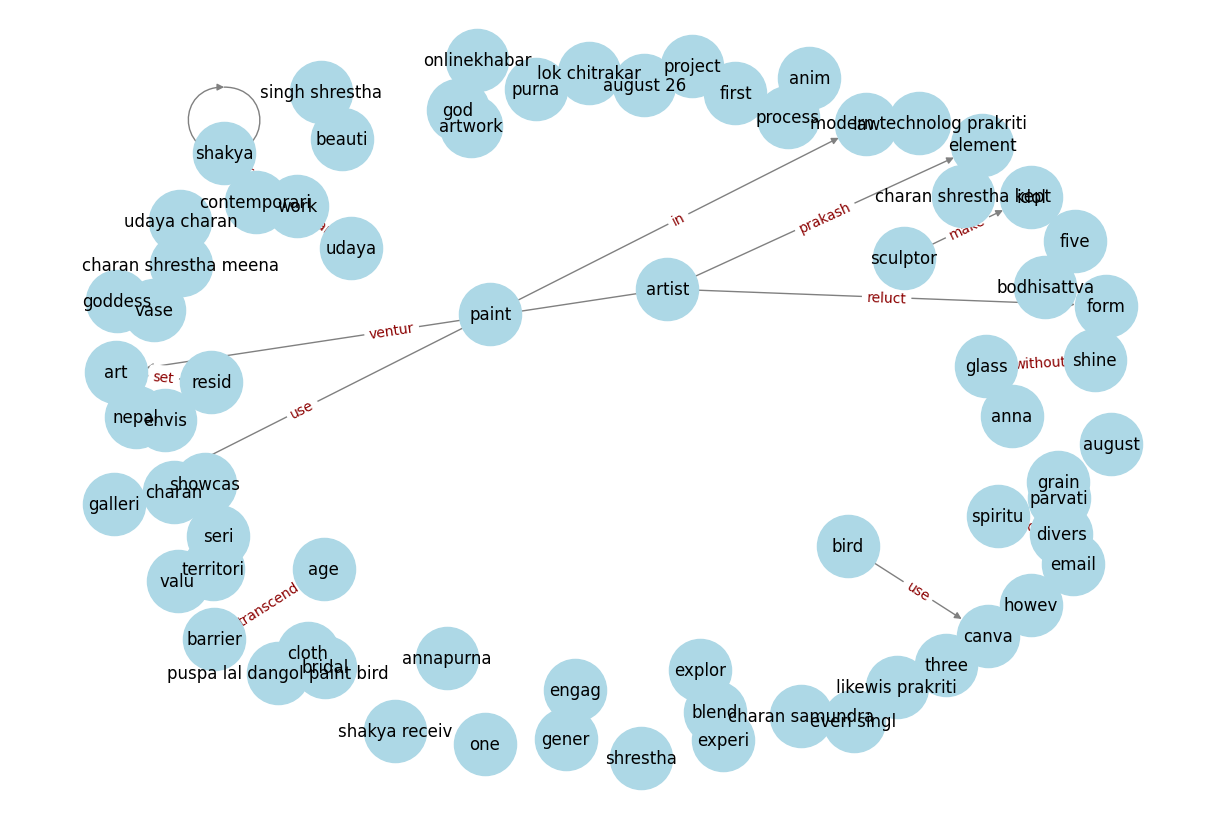

In [13]:
# Create the relationship graph
graph, extracted_data = graph_creator.create_relationship_graph(data)

# Draw the graph with enhanced visibility settings
pos = nx.spring_layout(graph, seed=42)
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
nx.draw(graph, pos, with_labels=True, node_size=2000, font_size=12, font_color="black", node_color="lightblue", edge_color="gray")
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="darkred", font_size=10)

plt.tight_layout()  # Prevent node labels from overlapping
plt.show()

## saving Graph

In [14]:
# Save the graph as a GraphML file
graphml_filename = "knowledge_graph.graphml"
nx.write_graphml(G, graphml_filename)